In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query

In [3]:
query = "Select * from Customers limit 4;"
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [4]:
query = "Select * from salesdata limit 3;"
read_query(query)


,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [5]:
query = """Select s.CustomerID,c.firstname,s.SaleDate,s.TotalPrice 
from salesdata s
join customers c
on c.CustomerID = s.CustomerID
order by s.CustomerID
limit 5;"""


read_query(query)

,CustomerID,firstname,SaleDate,TotalPrice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [6]:
query = """Select CustomerID,
sum(TotalPrice) as Expenditure 
from salesdata
group by CustomerID;"""


read_query(query)

,CustomerID,Expenditure
0,C-2023-100-1,9933032.00
1,C-2023-100-10,9779316.00
2,C-2023-100-100,9889393.00
3,C-2023-100-101,9168084.00
4,C-2023-100-102,10315608.00
...,...,...
195,C-2023-100-95,8826287.00
196,C-2023-100-96,9996920.00
197,C-2023-100-97,10432046.00
198,C-2023-100-98,8863324.00


In [7]:
query = """Select t.CustomerID , c.firstname , t.Expenditure
from
(Select CustomerID,
sum(TotalPrice) as Expenditure 
from salesdata
group by CustomerID) t
join Customers c
on t.CustomerID =c.CustomerID
order by Expenditure desc
limit 10;"""


top_annual_customers = read_query(query)

In [8]:
Customers_names = top_annual_customers['firstname'].values

In [9]:
Customers_names

array(['Veer', 'Priyansh', 'Riya', 'Vanya', 'Dhruv', 'Tarini', 'Yuvraj ',
       'Rhea', 'Darshit', 'Prerak'], dtype=object)

In [10]:
top_annual_customers['Expenditure'].values

array([Decimal('13016064.00'), Decimal('12629337.00'),
       Decimal('12599608.00'), Decimal('12455437.00'),
       Decimal('12280916.00'), Decimal('12130487.00'),
       Decimal('11868602.00'), Decimal('11704275.00'),
       Decimal('11520699.00'), Decimal('11442527.00')], dtype=object)

In [11]:
## Change decimal to float
top_annual_customers['Expenditure']=top_annual_customers['Expenditure'].astype(float)

In [12]:
Customer_exp = top_annual_customers['Expenditure'].values

In [13]:
Customer_exp

array([13016064., 12629337., 12599608., 12455437., 12280916., 12130487.,
       11868602., 11704275., 11520699., 11442527.])

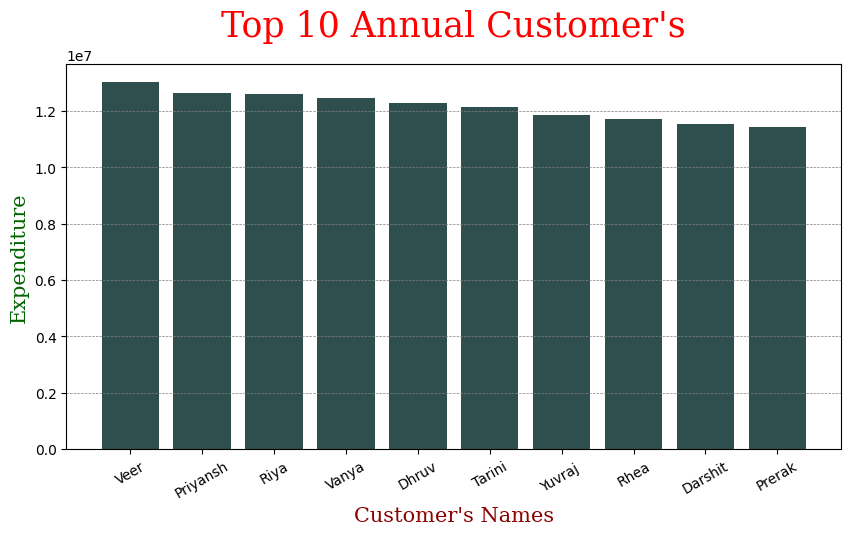

In [23]:
font1 = {"family":"serif","size":"25",'color':'Red'}
fontx = {"family":"serif","size":"15",'color':'darkred'}
fonty = {"family":"serif","size":"15",'color':'darkgreen'}

plt.figure(figsize=(10,5))
plt.bar(height= Customer_exp, x=Customers_names,color="darkslategray")
plt.title("Top 10 Annual Customer's",fontdict=font1,pad="20")

plt.xticks(rotation=30)
plt.xlabel("Customer's Names",fontdict=fontx)
plt.ylabel("Expenditure",fontdict=fonty)
plt.grid(axis= "y",color = "Gray", linestyle = "--" , linewidth = 0.5)

# Using CMAP

In [25]:
cmap_value = np.linspace(0.3,1,10)

In [27]:
camp = plt.cm.summer(cmap_value)

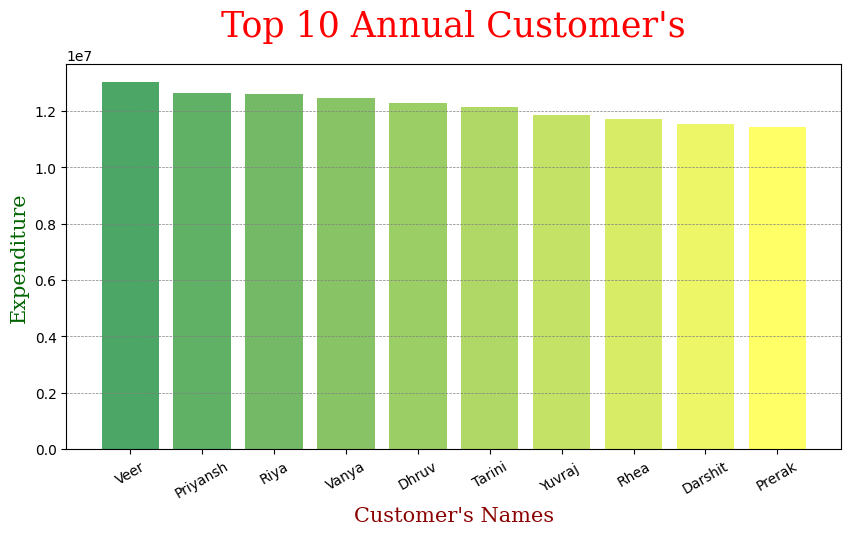

In [28]:
font1 = {"family":"serif","size":"25",'color':'Red'}
fontx = {"family":"serif","size":"15",'color':'darkred'}
fonty = {"family":"serif","size":"15",'color':'darkgreen'}

plt.figure(figsize=(10,5))
plt.bar(height= Customer_exp, x=Customers_names,color=camp)
plt.title("Top 10 Annual Customer's",fontdict=font1,pad="20")

plt.xticks(rotation=30)
plt.xlabel("Customer's Names",fontdict=fontx)
plt.ylabel("Expenditure",fontdict=fonty)
plt.grid(axis= "y",color = "Gray", linestyle = "--" , linewidth = 0.5)

In [30]:
query = 'select * from salesdata limit 10;'
read_query(query=query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00
5,23005,C-2023-100-72,6015,1012,2023-11-22,5,396935.00
6,23006,C-2023-100-78,6015,1044,2023-10-26,5,396935.00
7,23007,C-2023-100-36,6017,1018,2023-03-29,5,295510.00
8,23008,C-2023-100-147,6030,1049,2023-01-17,3,201936.00
9,23009,C-2023-100-7,6019,1047,2023-07-19,4,56188.00


In [43]:
query ='''select monthname(s.saledate) ,e.firstname ,sum(s.TotalPrice) as totalsales
from salesdata s
join employees e
on s.EmployeeID = e.EmployeeID
where monthname(s.saledate) ="january"
group by monthname(s.saledate),e.firstname
order by totalsales desc
limit 10;'''

df = read_query(query=query)

In [44]:
df.info

<bound method DataFrame.info of   monthname(s.saledate) firstname  totalsales
0               January    Bhavin  5775952.00
1               January    Nitara  5567036.00
2               January      Myra  4888628.00
3               January     Renee  3924716.00
4               January     Shray  3719152.00
5               January    Yuvaan  3348039.00
6               January     Anika  3152408.00
7               January     Kiaan  3136727.00
8               January    Yasmin  3135779.00
9               January     Hiran  3104523.00>

In [47]:
firstname =df['firstname'].values

In [49]:
df['totalsales'] =df['totalsales'].values.astype(float)

In [50]:
df['totalsales'].values

array([5775952., 5567036., 4888628., 3924716., 3719152., 3348039.,
       3152408., 3136727., 3135779., 3104523.])

<BarContainer object of 10 artists>

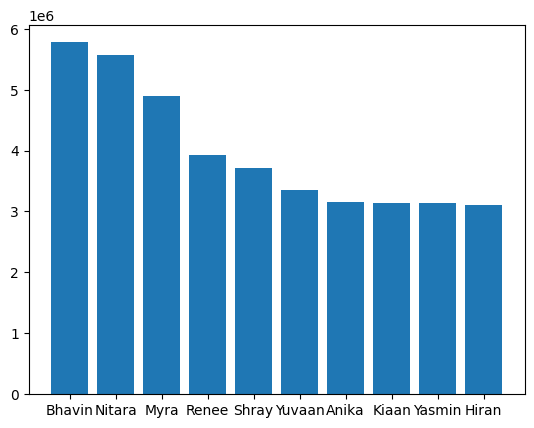

In [51]:
plt
plt.bar(height=df['totalsales'].values , x= firstname )

In [62]:
cmap_value =np.linspace(0.3,1,10)
cmap = plt.cm.BuGn(cmap_value)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bhavin'),
  Text(1, 0, 'Nitara'),
  Text(2, 0, 'Myra'),
  Text(3, 0, 'Renee'),
  Text(4, 0, 'Shray'),
  Text(5, 0, 'Yuvaan'),
  Text(6, 0, 'Anika'),
  Text(7, 0, 'Kiaan'),
  Text(8, 0, 'Yasmin'),
  Text(9, 0, 'Hiran')])

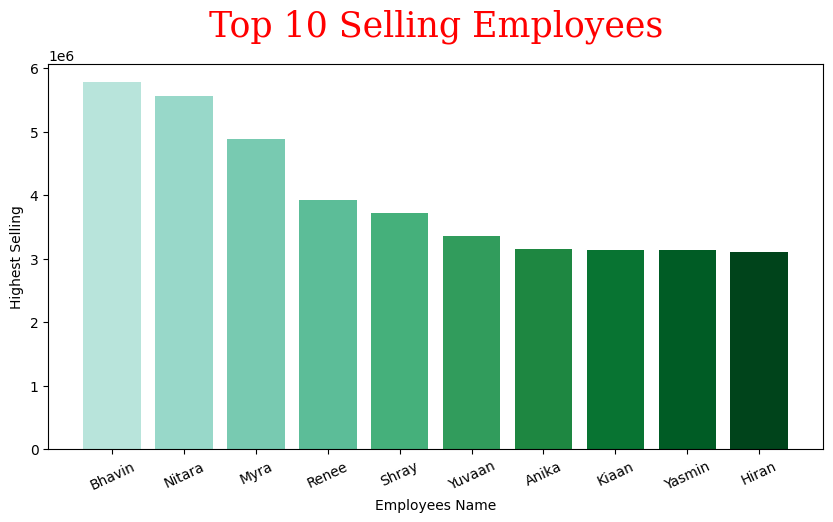

In [75]:
plt.figure(figsize=(10,5))
plt.bar(height=df['totalsales'].values , x= firstname , color =cmap )
plt.title('Top 10 Selling Employees',pad=20,fontdict= font1)
plt.xlabel('Employees Name')
plt.ylabel("Highest Selling")
plt.xticks(rotation=25)